# Exercise - Visualization of Data

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

### Step 2. Import the dataset from the AutoMPG dataset file. Assign it to a variable called mpg_df

In [3]:
df = pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


### Step 3. Perform basic EDA to understand the structure of the data

In [4]:
df.describe(include='all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [5]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [8]:
df.shape

(398, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


### Step 4. Check and handle the missing values, if any.

In [10]:
df.isna().sum() #Hence no missing or null values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

### Step 5. Create a plot to check the relationship between horsepower and acceleration. Note down your insight for the same. Beautify the graph using various customizations.

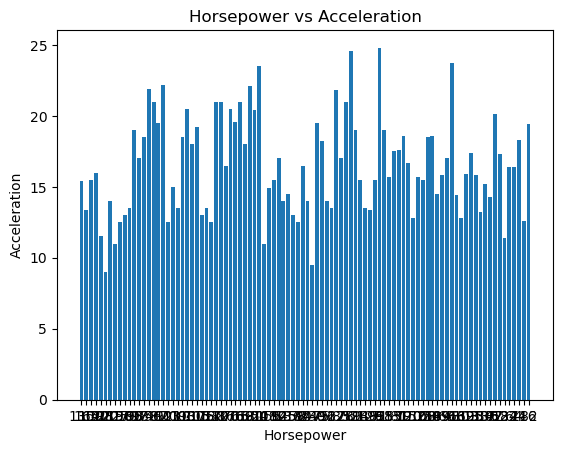

In [12]:
plt.bar(df['horsepower'], df['acceleration'])
plt.title("Horsepower vs Acceleration")
plt.xlabel("Horsepower")
plt.ylabel("Acceleration")
plt.show()

### Step 6. Generate subplots to display the histograms for acceleration, displacement and weight and kilometer_per_litre. Note down your insight for the same

array([[<AxesSubplot:title={'center':'acceleration'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'mpg'}>]], dtype=object)

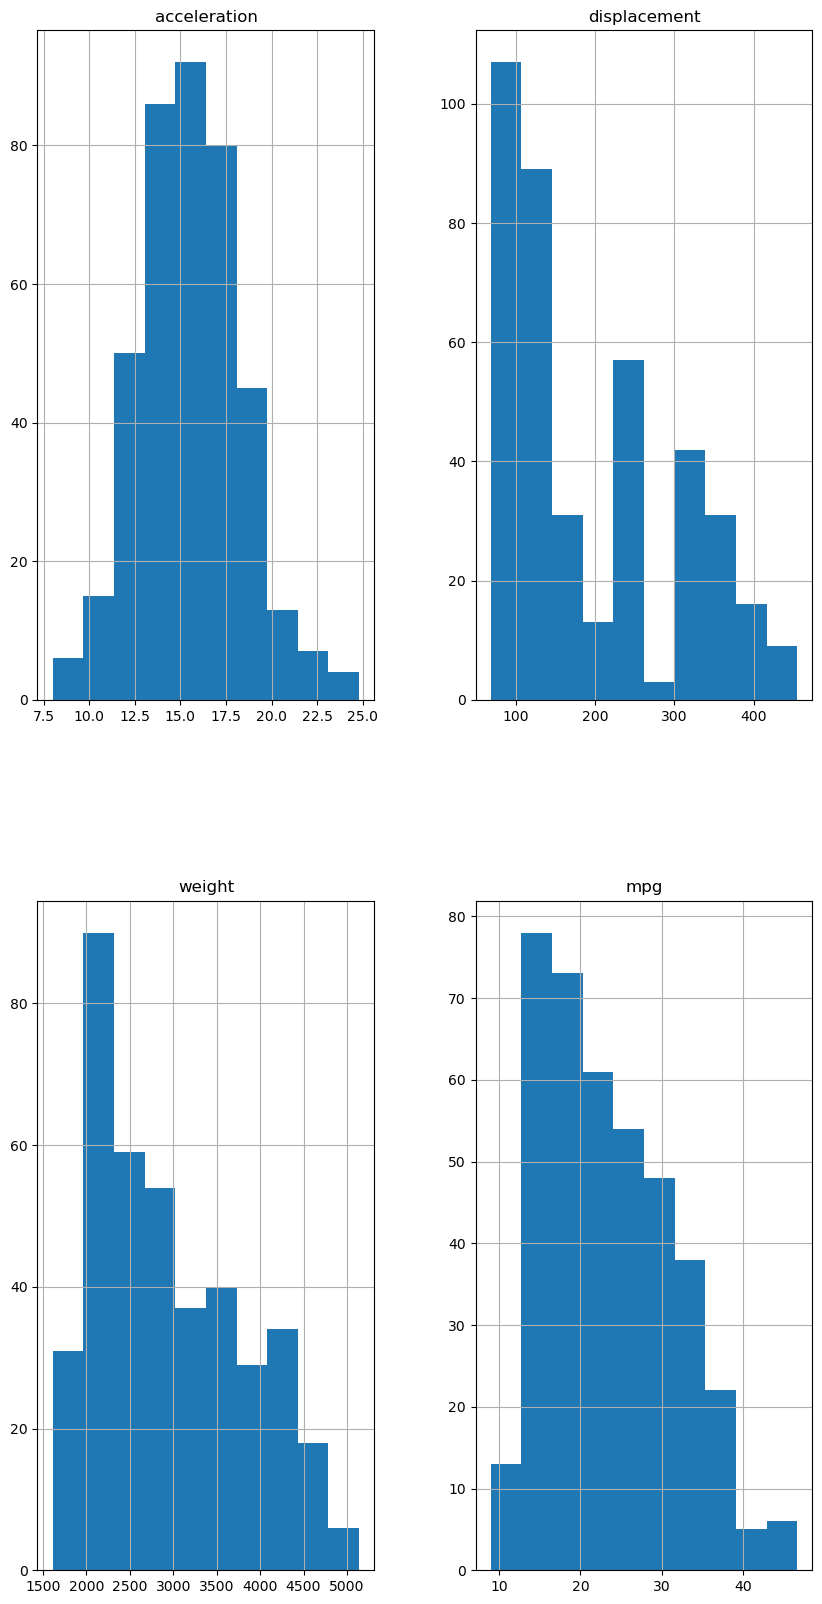

In [22]:
df.hist(column=['acceleration', 'displacement', 'weight', 'mpg'], figsize=(10,20))

### Step 7. Create a plot to check the relationship between displacement and weight for origin 2, color the datapoints based on no of cylinders. Note down your insight for the same and save the plot as an image file. 

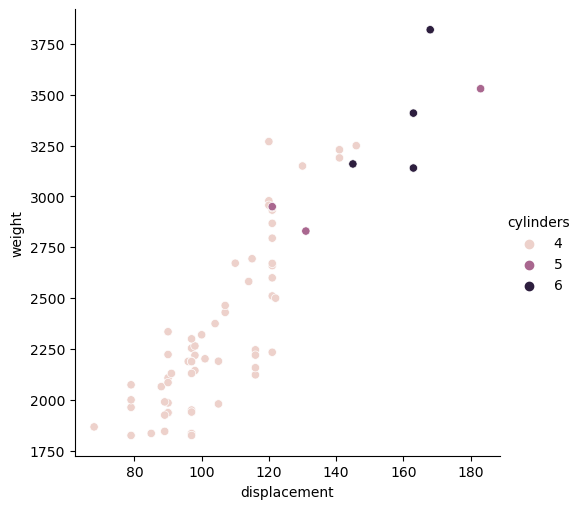

In [24]:
sns.relplot(x='displacement', y='weight', hue='cylinders', 
           data = df[['displacement', 'weight', 'cylinders', 'origin']][df['origin'] == 2])
plt.savefig('prob_1.png')

### Step 8. Display the frequency distribution of the Origin variable. Note down your insight for the same

<AxesSubplot:xlabel='origin', ylabel='count'>

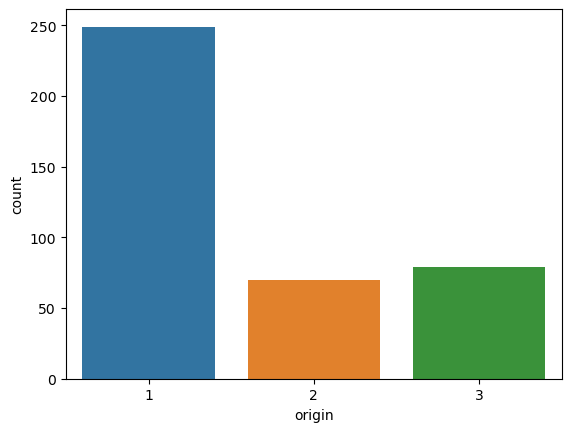

In [28]:
sns.countplot(x = 'origin', data=df)

### Step 9. Check the relationship of multiple variables wrt kilometer_per_litre. Note down your insight for the same

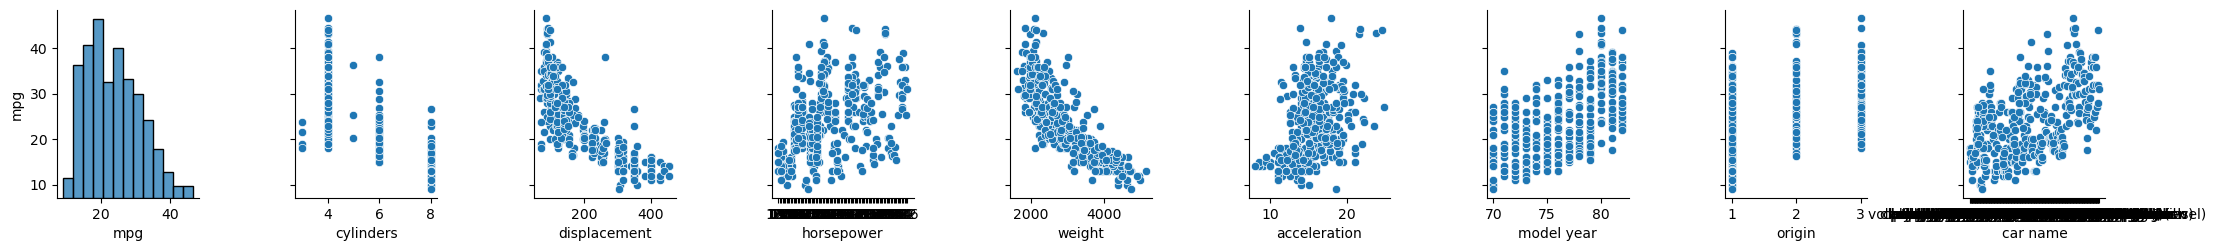

In [29]:
sns.pairplot(df, y_vars="mpg", x_vars=df.columns.values)

### Step 10. Display the average weight based on no of cylinders present. Note down the insight for the same

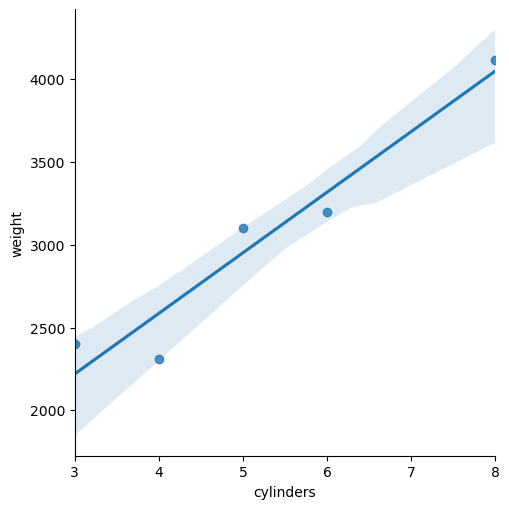

In [30]:
# plt.bar(df['weight'].mean(), df['cylinders'])
# plt.title("Average weights on no of cylinders")
# plt.xlabel("Avg Weight")
# plt.ylabel("No of Cylinders")
# plt.show()
sns.lmplot(x='cylinders', y = 'weight', data = df[['weight','cylinders']].groupby('cylinders').mean().reset_index())

### Step 11. Check for the outliers in the dataset. Note down the insight for the same.

<AxesSubplot:xlabel='horsepower', ylabel='acceleration'>

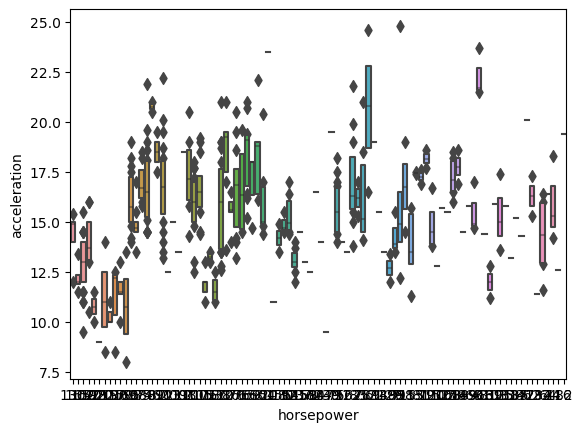

In [27]:
sns.boxenplot(x='horsepower', y='acceleration', data=df)

### Step 12. Plot the correlations for variables.

<AxesSubplot:>

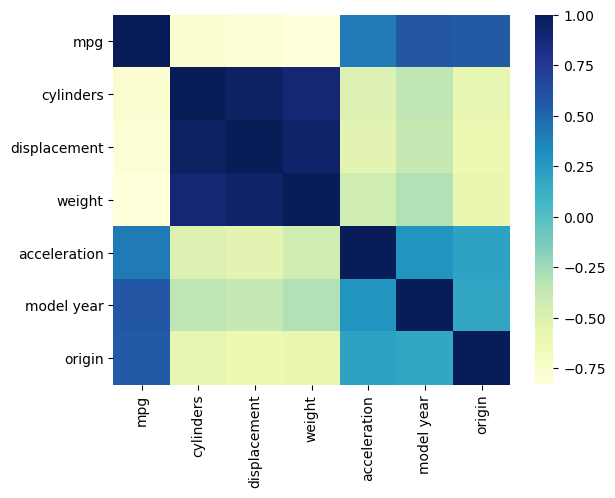

In [31]:
sns.heatmap(df.corr(), cmap='YlGnBu')